In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
df = pd.read_csv("iris.csv")
del df["Unnamed: 0"]
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


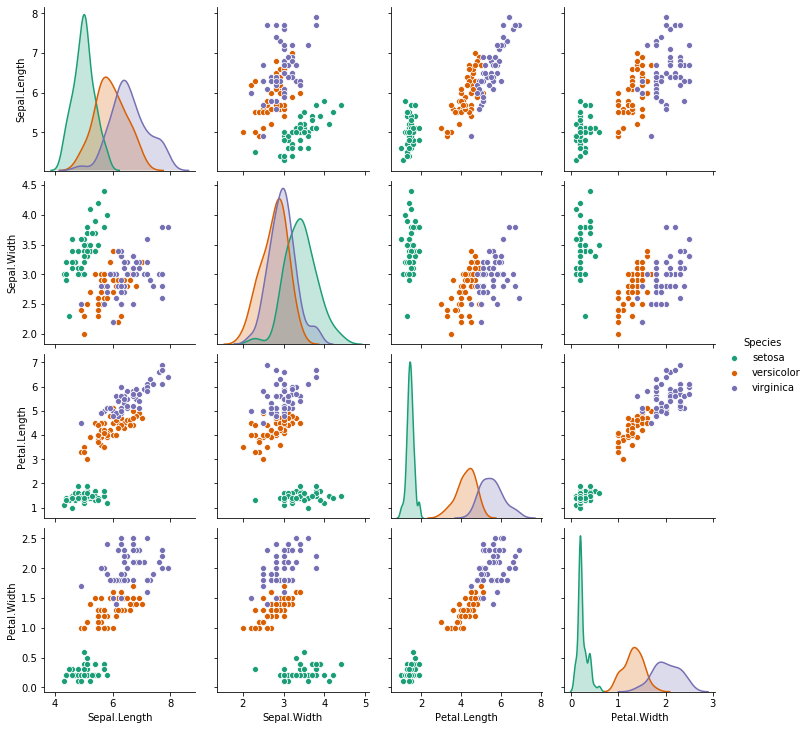

In [8]:
sns.pairplot(df, hue="Species", palette='Dark2')

In [9]:
df.std()

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [10]:
df["Sepal.Length"].max()

7.9

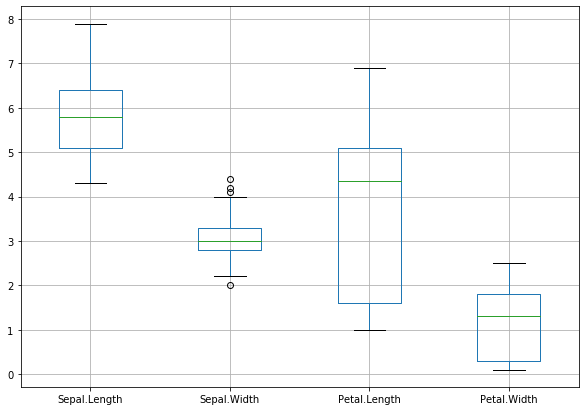

In [11]:
new_data = df[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]] 
plt.figure(figsize = (10, 7)) 
new_data.boxplot()

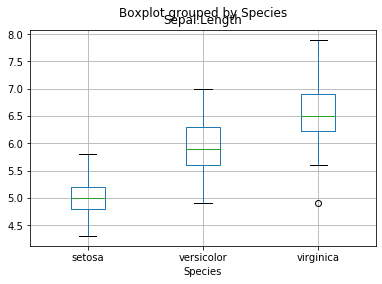

In [12]:
df.boxplot(column="Sepal.Length", by="Species")

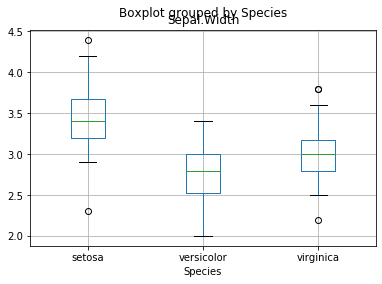

In [13]:
df.boxplot(column="Sepal.Width", by="Species")

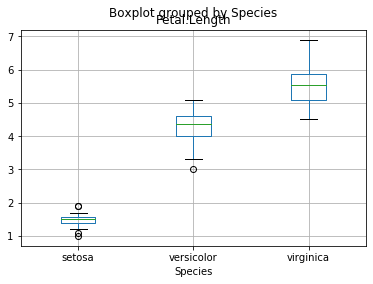

In [14]:
df.boxplot(column="Petal.Length", by="Species")

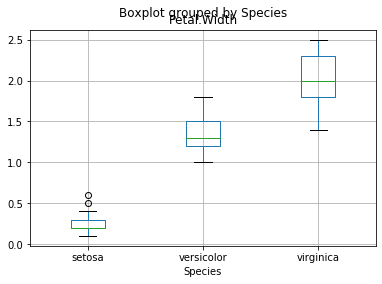

In [15]:
df.boxplot(column="Petal.Width", by="Species")

In [16]:
df_feat = df.iloc[:,:4]
df_target = df.iloc[:,-1]

In [17]:
df_feat

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaler.fit(df_feat)
df_new = scaler.transform(df_feat)

In [20]:
df_new = pd.DataFrame(df_new, columns=df_feat.columns)

In [21]:
df_new.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_new, df_target, test_size=0.30, random_state=0)

In [59]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0.5, 1.0, 'Error Rate V/S K Value')

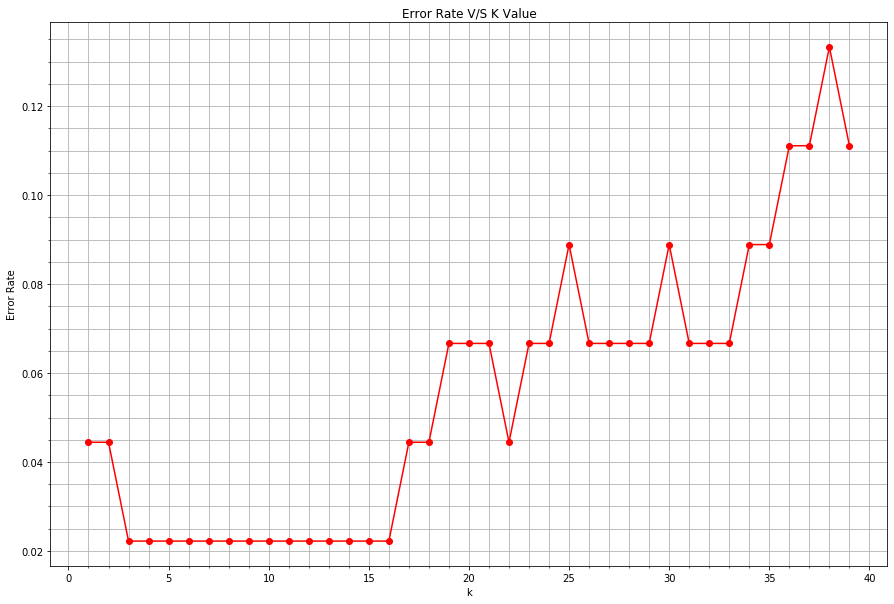

In [64]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40), error_rate, color="red", marker="o")
plt.minorticks_on()
plt.grid(which="both")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.title("Error Rate V/S K Value")

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [67]:
pred = knn.predict(X_test)

In [68]:
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [70]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [71]:
import pickle
pickle_out = open("classifier_iris.pkl","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()